In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st 
import numpy as np

In [2]:
#Import First Data Set
mouse_metadata_df = pd.read_csv("Mouse_metadata.csv")
mouse_metadata_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
#Import Second Data Set 
study_results_df = pd.read_csv("Study_results.csv")
study_results_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
mouse_studyresults_df = pd.merge(study_results_df, mouse_metadata_df, on=["Mouse ID"], how = "left")
mouse_studyresults_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [5]:
mouse_studyresults_df["Mouse ID"].nunique()

249

In [6]:
duplicate_time_points = mouse_studyresults_df[mouse_studyresults_df.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
duplicate_time_points

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
problem_mouseid = duplicate_time_points['Mouse ID'].unique()
problem_mouseid

array(['g989'], dtype=object)

In [8]:
mouse_study_cleaned = mouse_studyresults_df[~mouse_studyresults_df['Mouse ID'].isin(problem_mouseid)]
mouse_study_cleaned

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [9]:
mouse_study_cleaned.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [10]:
mouse_study_cleaned["Mouse ID"].nunique()

248

In [11]:
mouse_study_cleaned.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
dtype: object

In [12]:
mouse_study_cleaned.loc[:, 'Tumor Volume (mm3)'] = pd.to_numeric(mouse_study_cleaned['Tumor Volume (mm3)'], errors='raise')

In [13]:
mean_tumor = mouse_study_cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
mean_tumor

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [14]:
median_tumor = mouse_study_cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
median_tumor

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [15]:
variance_tumor = mouse_study_cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
variance_tumor

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [16]:
standard_dev_tumor = mouse_study_cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
standard_dev_tumor

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [17]:
standard_error_tumor = mouse_study_cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
standard_error_tumor

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [18]:
summary_table = pd.DataFrame({"Mean Tumor Volume": mean_tumor, "Median Tumor Volume": median_tumor, "Tumor Volume Variance": variance_tumor, 
                             "Tumor Volume Standard Deviation": standard_dev_tumor, "Tumor Volume Standard Error": standard_error_tumor})
summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [19]:
drugregimen_counts = mouse_study_cleaned["Drug Regimen"].value_counts()
drugregimen_counts

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

<Axes: title={'center': 'Total Number of Mouse ID/Timepoints for Each Drug Regimen'}, xlabel='Drug Regimen', ylabel='# Of Observed Mouse Timepoints'>

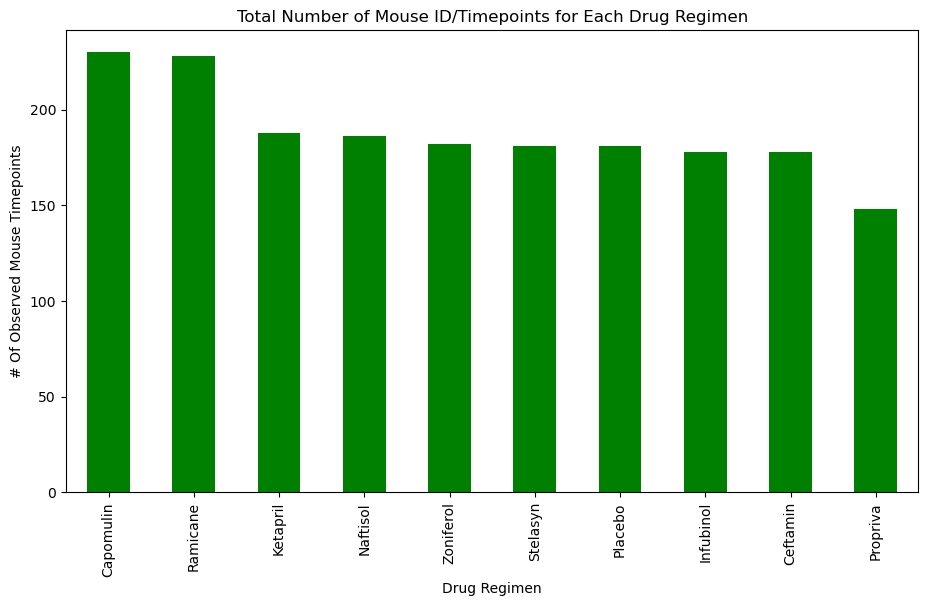

In [20]:
drugregimen_counts.plot(kind="bar", ylabel="# Of Observed Mouse Timepoints", title='Total Number of Mouse ID/Timepoints for Each Drug Regimen',color='green', figsize=(11, 6))

In [21]:
import numpy as np

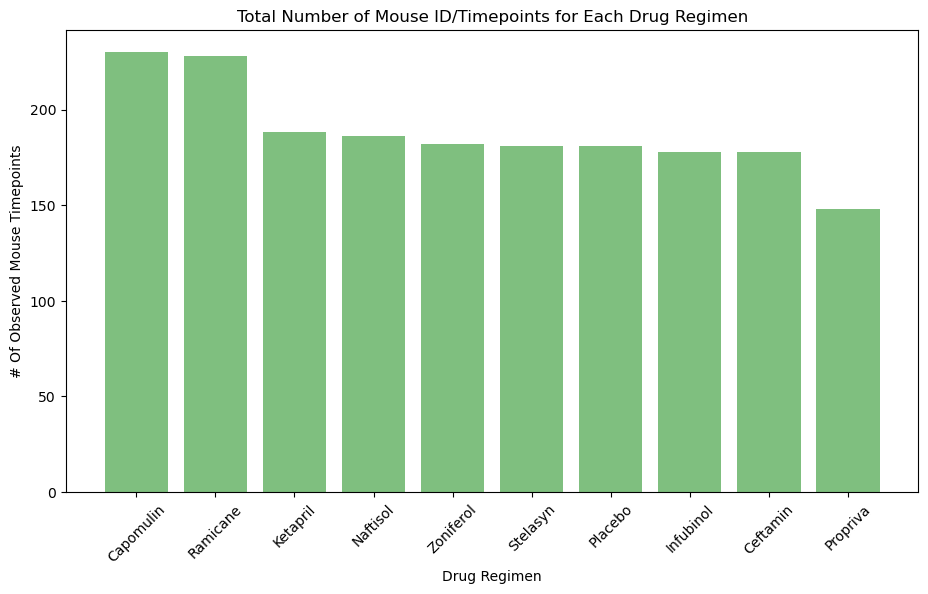

In [22]:
plt.figure(figsize=(11, 6))
x_axis = np.arange(0, len(drugregimen_counts))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugregimen_counts.index, rotation=45)
plt.bar(x_axis, drugregimen_counts, color='green', alpha=0.5)
plt.xlabel('Drug Regimen')
plt.ylabel("# Of Observed Mouse Timepoints")
plt.title('Total Number of Mouse ID/Timepoints for Each Drug Regimen')
plt.show()

In [23]:
male_and_female = mouse_studyresults_df["Sex"].value_counts()
male_and_female

Sex
Male      958
Female    935
Name: count, dtype: int64

<Axes: ylabel='count'>

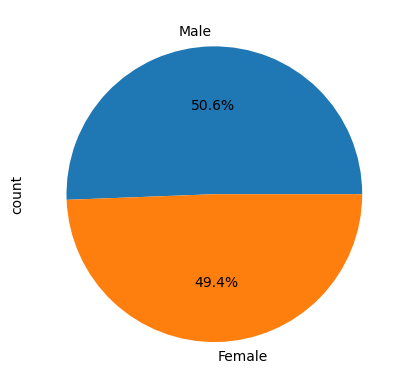

In [24]:
male_and_female.plot(kind="pie", autopct="%1.1f%%")

Text(0, 0.5, 'Count')

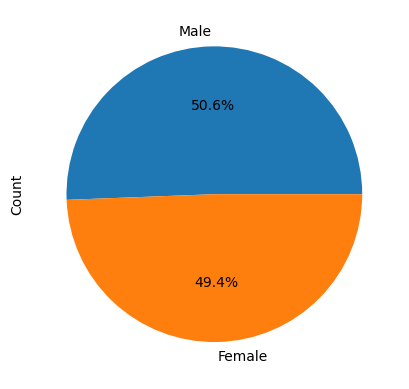

In [25]:
plt.pie(male_and_female.values, labels=male_and_female.index, autopct="%1.1f%%")
plt.ylabel("Count")

In [26]:
specific_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = mouse_study_cleaned[mouse_study_cleaned["Drug Regimen"].isin(specific_drugs)]
filtered_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
29,c326,0,45.000000,0,Infubinol,Female,18,25
30,c139,0,45.000000,0,Infubinol,Male,11,28
31,v339,0,45.000000,0,Infubinol,Male,20,26
32,a577,0,45.000000,0,Infubinol,Female,6,25
...,...,...,...,...,...,...,...,...
1879,a644,45,32.978522,1,Ramicane,Female,7,17
1885,i177,45,33.562402,3,Ramicane,Male,10,18
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17


In [27]:
final_tumor_volume = filtered_data.groupby(["Mouse ID", "Drug Regimen"]).agg(Final_Tumor_Volume=('Tumor Volume (mm3)', 'last')).reset_index()
final_tumor_volume.head()

,Mouse ID,Drug Regimen,Final_Tumor_Volume
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
2,a275,Ceftamin,62.999356
3,a411,Ramicane,38.407618
4,a444,Ramicane,43.047543


In [28]:
greatest_timepoint = filtered_data.groupby("Mouse ID")["Timepoint"].max()
greatest_timepoint.head()                                                  

Mouse ID
a203    45
a251    45
a275    45
a411    45
a444    45
Name: Timepoint, dtype: int64

In [29]:
final_merged_data = pd.merge(greatest_timepoint, filtered_data, on=["Mouse ID", "Timepoint"])
final_merged_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [30]:
treatment_names = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [31]:
tumor_volumes = []

In [32]:
for drug in treatment_names:
    final_drug_data = final_merged_data[final_merged_data["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    tumor_volumes.append(final_drug_data)

In [33]:
for i, drug in enumerate(treatment_names):
    quartiles = tumor_volumes[i].quantile([0.25, 0.5, 0.75])
    lowerquartile = quartiles[0.25]
    upperquartile = quartiles[0.75]
    inter_quartile_range = upperquartile - lowerquartile
    lower_bound = lowerquartile - (1.5 * inter_quartile_range)
    upper_bound = upperquartile + (1.5 * inter_quartile_range)
    possible_outliers = tumor_volumes[i][(tumor_volumes[i]<lower_bound) | (tumor_volumes[i]>upper_bound)]
    print(f"{drug}: {possible_outliers}")

Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [34]:
flierprops = dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none')

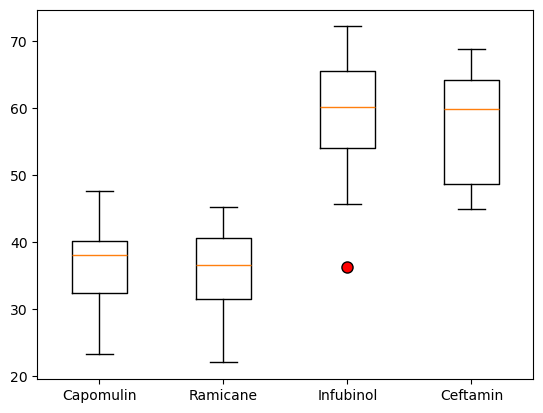

In [35]:
fig, ax = plt.subplots()
ax.boxplot(tumor_volumes, labels=treatment_names, flierprops=flierprops)
plt.show()

In [36]:
capomulin_df = filtered_data[filtered_data["Drug Regimen"]=="Capomulin"]
capomulin_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


In [37]:
capomulin_single_mouse = filtered_data[filtered_data["Mouse ID"]=="l509"]
capomulin_single_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207288,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


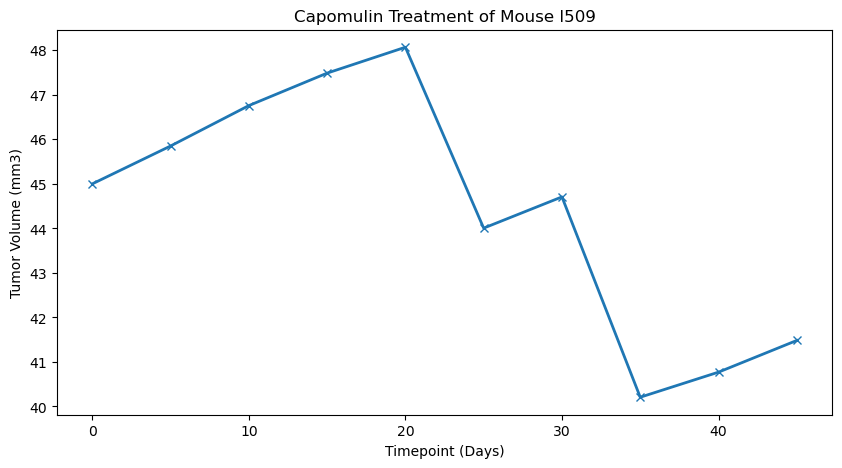

In [38]:
plt.figure(figsize=(10, 5))
plt.plot(capomulin_single_mouse["Timepoint"], capomulin_single_mouse["Tumor Volume (mm3)"], linewidth=2, marker="x")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")
plt.show()

In [39]:
average_tumor_volume = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
average_tumor_volume.head()

Mouse ID
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
Name: Tumor Volume (mm3), dtype: float64

In [40]:
capomulin_avg_tumorweight = pd.merge(average_tumor_volume, mouse_metadata_df[["Mouse ID", "Weight (g)"]], on=["Mouse ID"])
capomulin_avg_tumorweight.head()

,Mouse ID,Tumor Volume (mm3),Weight (g)
0,b128,41.963636,22
1,b742,40.083699,21
2,f966,36.505973,17
3,g288,41.990097,19
4,g316,44.613344,22


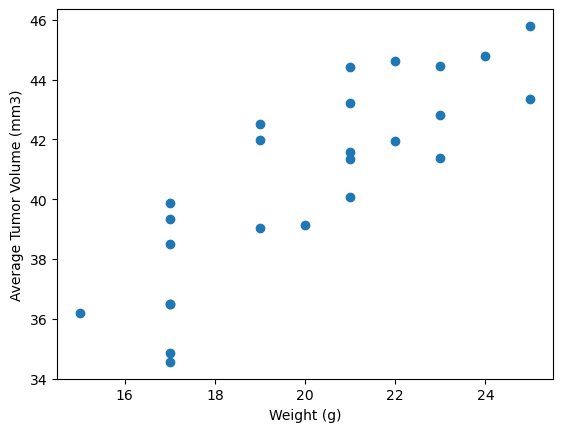

In [41]:
plt.scatter(capomulin_avg_tumorweight["Weight (g)"], capomulin_avg_tumorweight["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

In [42]:
from scipy.stats import linregress

The correlation between mouse weight and the average tumor volume is 0.84


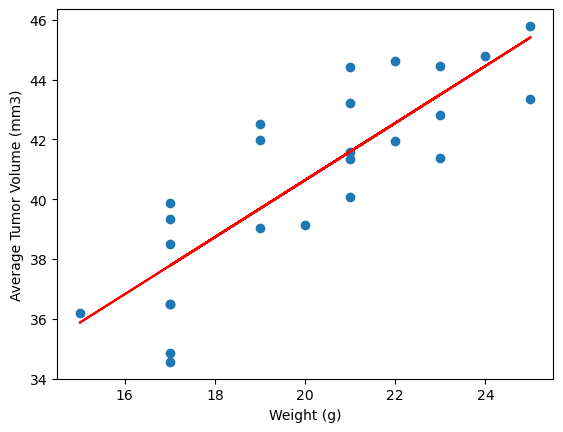

In [43]:
correlation = round(capomulin_avg_tumorweight["Weight (g)"].corr(capomulin_avg_tumorweight["Tumor Volume (mm3)"]), 2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation}")
plt.scatter(capomulin_avg_tumorweight["Weight (g)"], capomulin_avg_tumorweight["Tumor Volume (mm3)"])
slope, intercept, r_value, p_value, std_err = linregress(capomulin_avg_tumorweight["Weight (g)"], capomulin_avg_tumorweight["Tumor Volume (mm3)"])
plt.plot(capomulin_avg_tumorweight["Weight (g)"], intercept + slope * capomulin_avg_tumorweight["Weight (g)"], color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()